In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import gzip
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
import string
from collections import defaultdict
from nltk.stem.porter import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import datetime
import dateutil
import scipy
import tensorflow as tf
import time
import json
import pandas as pd
from dateutil import parser
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics
import seaborn as sns

## Reading the data

In [ ]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

#path1 = "/content/drive/MyDrive/modcloth_final_data.json"
path2 = "/content/drive/MyDrive/renttherunway_final_data.json"

print("Reading")

#ModCloth = list(parseData(path1))
Rent_Run = list(parseData(path2))
print("Reading done")

Reading
Reading done


In [3]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

#path1 = "/content/drive/MyDrive/modcloth_final_data.json"
path2 = "/content/drive/MyDrive/renttherunway_final_data.json"

print("Reading")

#ModCloth = list(parseData(path1))
Rent_Run = list(parseData(path2))
print("Reading done")

Reading
Reading done


## Cleaning the Data

In [ ]:
Rent_Run[3]

{'age': '34',
 'body type': 'pear',
 'bust size': '34c',
 'category': 'dress',
 'fit': 'fit',
 'height': '5\' 5"',
 'item_id': '126335',
 'rating': '8',
 'rented for': 'formal affair',
 'review_date': 'February 12, 2014',
 'review_summary': 'Dress arrived on time and in perfect condition. ',
 'review_text': "I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!",
 'size': 8,
 'user_id': '909926',
 'weight': '135lbs'}

In [ ]:
type(Rent_Run)

list

In [ ]:
## Creating a DataFrame
Data_df = pd.DataFrame.from_dict(Rent_Run)

In [ ]:
Data_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


In [ ]:
## Wrangling the DF
print(Data_df.info())
print(Data_df.describe())
print(Data_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192544 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB
None
                size
count  192544.000000
mean       12.245175
std 

In [ ]:
print(Data_df['fit'].unique())
print(Data_df['bust size'].unique())
print(Data_df['weight'].unique())
print(Data_df['rating'].unique())
print(Data_df['rented for'].unique())
print(Data_df['body type'].unique())
print(Data_df['category'].unique())
print(Data_df['height'].unique())
print(Data_df['size'].unique())
print(Data_df['age'].unique()) 
print(Data_df['review_date'].unique())

['fit' 'small' 'large']
['34d' '34b' nan '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '40ddd/e' '32a' '38d+' '38c' '34ddd/e'
 '38a' '38b' '38d' '36ddd/e' '38dd' '38f' '42dd' '36dd' '40g' '40dd' '28f'
 '30ddd/e' '32ddd/e' '28b' '36d+' '40d' '28dd' '34f' '42c' '30d' '30b'
 '42d' '34aa' '32aa' '36f' '28c' '40b' '36aa' '34g' '32f' '42ddd/e' '40c'
 '28g' '28aa' '36g' '30a' '44ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g'
 '38h' '30h' '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '32j' '46c' '48d' '38aa' '38i' '48dd' '28d' '28i' '46ddd/e' '42g' '44c'
 '42f' '40j' '38j' '46f' '44b' '44g' '42h' '40i' '44h']
['137lbs' '132lbs' nan '135lbs' '145lbs' '138lbs' '112lbs' '118lbs'
 '114lbs' '120lbs' '142lbs' '140lbs' '170lbs' '143lbs' '115lbs' '123lbs'
 '122lbs' '165lbs' '130lbs' '155lbs' '105lbs' '190lbs' '150lbs' '136lbs'
 '128lbs' '174lbs' '125lbs' '110lbs' '160lbs' '180l

In [ ]:
Data_df.dtypes

fit               object
user_id           object
bust size         object
item_id           object
weight            object
rating            object
rented for        object
review_text       object
body type         object
review_summary    object
category          object
height            object
size               int64
age               object
review_date       object
dtype: object

In [ ]:
print(Data_df.isnull().sum())

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating                0
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64


In [ ]:
Data_df["bust size"].fillna("Not Applicable", inplace = True)
Data_df["body type"].fillna("Not Applicable", inplace = True)
Data_df["rented for"].fillna("Not Applicable", inplace = True)

In [ ]:
print(Data_df.isnull().sum())

fit                   0
user_id               0
bust size             0
item_id               0
weight            29982
rating                0
rented for            0
review_text           0
body type             0
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64


In [ ]:
Data_df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [ ]:
Data_df[['W1','W2']] = Data_df.weight.str.split("l",expand=True)

In [ ]:
Data_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,W1,W2
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016",137,bs
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013",132,bs
2,fit,360448,Not Applicable,1063761,NaN,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015",NaN,NaN
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014",135,bs
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016",145,bs


In [ ]:
#Data_df.drop(['weight', 'W2'], axis = 1)
Data_df = Data_df.drop(['weight','W2'], axis = 1)
Data_df.rename(columns = {"W1": "weight"}, 
          inplace = True)

In [ ]:
Data_df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016",137
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013",132
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015",NaN
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014",135
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016",145


In [ ]:
Data_df.dtypes

fit               object
user_id           object
bust size         object
item_id           object
rating            object
rented for        object
review_text       object
body type         object
review_summary    object
category          object
height            object
size               int64
age               object
review_date       object
weight            object
dtype: object

In [ ]:
Data_df[['weight']] = Data_df[['weight']].apply(pd.to_numeric)

In [ ]:
mean_wt = Data_df['weight'].mean()
mean_wt

137.39170900948562

In [ ]:
Data_df['weight'].fillna(value=mean_wt, inplace=True)

In [ ]:
Data_df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016",137.000000
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013",132.000000
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015",137.391709
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014",135.000000
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016",145.000000


In [ ]:
Data_df['height'][:10]

0    5' 8"
1    5' 6"
2    5' 4"
3    5' 5"
4    5' 9"
5    5' 8"
6    5' 3"
7    5' 3"
8    5' 6"
9    5' 3"
Name: height, dtype: object

In [ ]:
#Data_df[['W1','W2']] = Data_df.height.str.split("l",expand=True)

In [ ]:
def feet_to_float(cell_string):
    try:
        split_strings = cell_string.replace('"','').replace("'",'').split()
        float_value = float(split_strings[0])*12 +float(split_strings[1])
    except:
        float_value = np.nan
    return float_value

In [ ]:
#df = Data_df.copy()
#df['height'] = df['height'].apply(feet_to_float)
#df.head()

In [ ]:
Data_df['height'] = Data_df['height'].apply(feet_to_float)
Data_df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28,"April 20, 2016",137.000000
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36,"June 18, 2013",132.000000
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116,"December 14, 2015",137.391709
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34,"February 12, 2014",135.000000
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27,"September 26, 2016",145.000000


In [ ]:
Data_df.dtypes

fit                object
user_id            object
bust size          object
item_id            object
rating             object
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size                int64
age                object
review_date        object
weight            float64
dtype: object

In [ ]:
Data_df['age'][:10]

0     28
1     36
2    116
3     34
4     27
5     45
6     27
7     65
8     27
9     33
Name: age, dtype: object

In [ ]:
Data_df[['age']] = Data_df[['age']].apply(pd.to_numeric)

In [ ]:
mean_age = Data_df['age'].mean()
mean_age

33.871017412727575

In [ ]:
Data_df['age'].fillna(value=mean_age, inplace=True)

In [ ]:
age_outlier = (Data_df["age"] == 0) | (Data_df["age"] > 90) 
Data_df["age"] = np.where(age_outlier == True,mean_age,Data_df["age"])

In [ ]:
mean_ht = Data_df['height'].mean()
mean_ht

65.31062142004617

In [ ]:
Data_df['height'].fillna(value=mean_ht, inplace=True)

In [ ]:
print(Data_df.isnull().sum())

fit               0
user_id           0
bust size         0
item_id           0
rating            0
rented for        0
review_text       0
body type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
weight            0
dtype: int64


In [ ]:
# df['review_date'] = pd.to_datetime(df['review_date'], infer_datetime_format=True)

In [ ]:
# df['review_date_ts'] = df[['review_date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [ ]:
Data_df['review_date'] = pd.to_datetime(Data_df['review_date'], infer_datetime_format=True)
Data_df['review_date_ts'] = Data_df[['review_date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [ ]:
Data_df.dtypes

fit                       object
user_id                   object
bust size                 object
item_id                   object
rating                    object
rented for                object
review_text               object
body type                 object
review_summary            object
category                  object
height                   float64
size                       int64
age                      float64
review_date       datetime64[ns]
weight                   float64
review_date_ts             int64
dtype: object

In [ ]:
Data_df[['rating']] = Data_df[['rating']].apply(pd.to_numeric)

In [ ]:
Data_df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight,review_date_ts
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,137.000000,1461110400
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,132.000000,1371513600
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0,2015-12-14,137.391709,1450051200
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12,135.000000,1392163200
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26,145.000000,1474848000


In [ ]:
df = Data_df.copy()
df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight,review_date_ts
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,137.000000,1461110400
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,132.000000,1371513600
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0,2015-12-14,137.391709,1450051200
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12,135.000000,1392163200
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26,145.000000,1474848000


In [ ]:
df['user_id_len'] = df['user_id'].astype(str).map(len)

In [ ]:
df.user_id_len.unique()

array([6, 5, 4, 3, 2, 1])

In [ ]:
len(df.review_summary.unique())

154731

In [ ]:
len(df)

192544

In [ ]:
df['Review_ID_rand'] = df['review_text'].apply(lambda x: random.randint(11111111,99999999))

In [ ]:
df.head()

,fit,user_id,bust size,item_id,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,weight,review_date_ts,user_id_len,Review_ID_rand
0,fit,420272,34d,2260466,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,137.000000,1461110400,6,85972849
1,fit,273551,34b,153475,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,132.000000,1371513600,6,94411659
2,fit,360448,Not Applicable,1063761,10,party,This hugged in all the right places! It was a ...,Not Applicable,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0,2015-12-14,137.391709,1450051200,6,63189581
3,fit,909926,34c,126335,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12,135.000000,1392163200,6,47210419
4,fit,151944,34b,616682,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26,145.000000,1474848000,6,22706373


In [ ]:
df_tfidf = df.to_dict('records') 

In [ ]:
df['user_id'].min()

'100011'

In [ ]:
df['user_id'].max()

'999997'

In [ ]:
df_tfidf[0]

{'Review_ID_rand': 85972849,
 'age': 28.0,
 'body type': 'hourglass',
 'bust size': '34d',
 'category': 'romper',
 'fit': 'fit',
 'height': 68.0,
 'item_id': '2260466',
 'rating': 10,
 'rented for': 'vacation',
 'review_date': Timestamp('2016-04-20 00:00:00'),
 'review_date_ts': 1461110400,
 'review_summary': 'So many compliments!',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'size': 14,
 'user_id': '420272',
 'user_id_len': 6,
 'weight': 137.0}

In [ ]:
Clean_Data = Data_df.to_dict('records')

In [ ]:
Clean_Data[1]

{'age': 36.0,
 'body type': 'straight & narrow',
 'bust size': '34b',
 'category': 'gown',
 'fit': 'fit',
 'height': 66.0,
 'item_id': '153475',
 'rating': 10,
 'rented for': 'other',
 'review_date': Timestamp('2013-06-18 00:00:00'),
 'review_date_ts': 1371513600,
 'review_summary': 'I felt so glamourous!!!',
 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
 'size': 12,
 'user_id': '273551',
 'weight': 132.0}

## Build a sentiment analysis model that estimates star ratings from a 1,000 word bag-of-words model (based on the most popular words). Compare models based on:
##(a) the 1,000 most common unigrams;
##(b) the 1,000 most common bigrams;
##(c) the 1,000 most common trigrams;
##(d) the 1,000 most common unigrams + bigrams;
##(e) the 1,000 most common unigrams + trigrams;
##(f) the 1,000 most common bigrams + trigrams;
##(g) the 1,000 most common unigrams + bigrams + trigrams;

### **(A) Unigram model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    for w in ws:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
words[:10]

['the', 'i', 'a', 'and', 'it', 'was', 'dress', 'to', 'this', 'but']

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    for w in ws:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## To find the best value of 'alpha' we use cross validation fucntion RidgeCV to get the optimal MSE
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.03527401155359316, normalize=True)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([9.1600253 , 8.74581837, 9.83216709, 9.18883586, 9.60644585,
       1.62209883, 6.81197581, 9.04801302, 8.92822123, 9.06339349])

In [ ]:
## Finding MSE for test data and our predictions
MSE_uni = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the unigram model is: "+ str(MSE_uni))

The MSE for the unigram model is: 1.5467625234806293


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'unfortunately'),
 (-0.6976947367128599, 'disappointed'),
 (-0.6097169125007252, 'awkward'),
 (-0.572824483162106, 'stars'),
 (-0.5442463623759888, 'boxy'),
 (-0.44697266766743726, 'weird'),
 (-0.36016957600172567, 'least'),
 (-0.35787156400896836, 'huge'),
 (-0.33604562931815973, 'baggy'),
 (-0.2980082831012176, 'end')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'amazing'),
 (0.32383034964084445, 'excellent'),
 (0.33171664124344313, 'worried'),
 (0.3333338861566059, 'buying'),
 (0.34120179603943385, 'perfect'),
 (0.35360729868761476, 'justice'),
 (0.3554265128650439, 'deal'),
 (0.3560546557281152, 'glove'),
 (0.36524067281495937, 'incredible'),
 (0.38635638121976645, 'bother')]

### **(B) Bigram model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws2:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
words[:10]

['this dress',
 'it was',
 'the dress',
 'a little',
 'in the',
 'was a',
 'and the',
 'i wore',
 'i was',
 'for a']

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_bi(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws2:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_bi(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.06164233697210317

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.06164233697210317, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([ 9.14093623,  8.60356087,  9.66072321, 10.05351159,  8.59845748,
        3.92659093,  7.04560403,  9.40955788,  9.08391711,  8.85734994])

In [ ]:
## Finding MSE for test data and our predictions
MSE_bi = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the Bigram model is: "+ str(MSE_bi))

The MSE for the Bigram model is: 1.5983417771019321


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'the picture'),
 (-0.6976947367128599, 'a summer'),
 (-0.6097169125007252, 'large i'),
 (-0.572824483162106, 'the day'),
 (-0.5442463623759888, '4 fit'),
 (-0.44697266766743726, 'and fun'),
 (-0.36016957600172567, 'the pattern'),
 (-0.35787156400896836, 'though i'),
 (-0.33604562931815973, 'was pretty'),
 (-0.2980082831012176, 'that was')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'the bottom'),
 (0.32383034964084445, 'dressed up'),
 (0.33171664124344313, 'so much'),
 (0.3333338861566059, 'down the'),
 (0.34120179603943385, 'with a'),
 (0.35360729868761476, 'but with'),
 (0.3554265128650439, 'only complaint'),
 (0.3560546557281152, 'flattering and'),
 (0.36524067281495937, 'been a'),
 (0.38635638121976645, 'in and')]

## **(C) Trigram Model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws3:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
words[:10]

['it was a',
 'was a little',
 'true to size',
 'the dress was',
 'this dress was',
 'and it was',
 'i wore this',
 'this dress is',
 'of the dress',
 'the dress is']

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_tri(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws3:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_tri(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.0466301673441609

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.0466301673441609, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([9.39680938, 8.44443102, 9.21196757, 9.89917759, 8.95926061,
       7.8173428 , 6.89441016, 8.00414296, 9.60953117, 8.78376535])

In [ ]:
## Finding MSE for test data and our predictions
MSE_tri = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the Trigram model is: "+ str(MSE_tri))

The MSE for the Trigram model is: 1.7279853352074996


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'dress fit like'),
 (-0.6976947367128599, 'a dress that'),
 (-0.6097169125007252, 'it ended up'),
 (-0.572824483162106, 'little bit of'),
 (-0.5442463623759888, 'up wearing this'),
 (-0.44697266766743726, 'is that it'),
 (-0.36016957600172567, 'since it was'),
 (-0.35787156400896836, 'like i was'),
 (-0.33604562931815973, 'so i ordered'),
 (-0.2980082831012176, 'i paired it')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'definitely rent again'),
 (0.32383034964084445, 'because i am'),
 (0.33171664124344313, 'a little large'),
 (0.3333338861566059, 'a great fit'),
 (0.34120179603943385, 'dress for a'),
 (0.35360729868761476, 'because it is'),
 (0.3554265128650439, 'a million bucks'),
 (0.3560546557281152, 'inch heels and'),
 (0.36524067281495937, 'the lace is'),
 (0.38635638121976645, 'it a little')]

## **(D) Unigram + Bigram Model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_uni_bi(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_uni_bi(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X[:2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.026683496156031508

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.026683496156031508, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([9.23319221, 8.72305166, 9.56168624, 9.47156438, 9.30892209,
       3.40099809, 6.82336609, 9.32652717, 8.54975074, 9.07740508])

In [ ]:
## Finding MSE for test data and our predictions
MSE_ub = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the combined unigram and bigram model is: "+ str(MSE_ub))

The MSE for the combined unigram and bigram model is: 1.5403161714922609


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'fitting'),
 (-0.6976947367128599, 'im a'),
 (-0.6097169125007252, 'place'),
 (-0.572824483162106, 'jacket'),
 (-0.5442463623759888, 'totally'),
 (-0.44697266766743726, 'such'),
 (-0.36016957600172567, 'dress that'),
 (-0.35787156400896836, 'two'),
 (-0.33604562931815973, 'sizing'),
 (-0.2980082831012176, 'dress to')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'other'),
 (0.32383034964084445, 'dress in'),
 (0.33171664124344313, 'style'),
 (0.3333338861566059, 'i wasnt'),
 (0.34120179603943385, 'little'),
 (0.35360729868761476, 'women'),
 (0.3554265128650439, 'it didnt'),
 (0.3560546557281152, 'able'),
 (0.36524067281495937, 'got tons'),
 (0.38635638121976645, 'due to')]

Text(0, 0.5, 'Predicted Ratings')

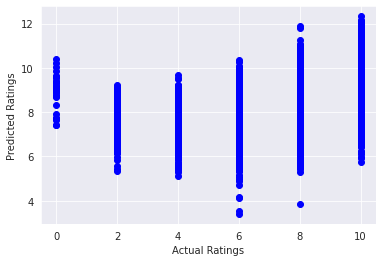

In [ ]:
## Y_pred vs y_test graph
plt.plot(y_test, Y_pred, 'o', color='blue')

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")

## **(E) Unigram + Trigram Model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws + ws3:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_uni_tri(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws + ws3:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_uni_tri(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.026683496156031508

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.026683496156031508, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([8.94482344, 8.71751202, 9.80307933, 9.4369024 , 9.58628219,
       3.25214714, 6.80588249, 8.37781644, 8.92824631, 9.1184683 ])

In [ ]:
## Finding MSE for test data and our predictions
MSE_ut = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the combined unigram and trigram model is: "+ str(MSE_ut))

The MSE for the combined unigram and trigram model is: 1.552306314352251


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'on the dress'),
 (-0.6976947367128599, 'vibrant'),
 (-0.6097169125007252, 'ordering'),
 (-0.572824483162106, 'outfit'),
 (-0.5442463623759888, 'across'),
 (-0.44697266766743726, 'issues'),
 (-0.36016957600172567, 'details'),
 (-0.35787156400896836, 'every'),
 (-0.33604562931815973, 'skin'),
 (-0.2980082831012176, 'best')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'loved this dress'),
 (0.32383034964084445, 'i paired it'),
 (0.33171664124344313, 'them'),
 (0.3333338861566059, 'this for my'),
 (0.34120179603943385, 'perfect'),
 (0.35360729868761476, 'bachelorette'),
 (0.3554265128650439, 'the perfect length'),
 (0.3560546557281152, 'tape'),
 (0.36524067281495937, 'consider'),
 (0.38635638121976645, 'helped')]

## **(F) Bigram + Trigram Model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws2 + ws3:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_bi_tri(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws2 + ws3:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_bi_tri(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.020185086292982747

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.020185086292982747, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([9.02895739, 8.54925658, 9.64294379, 9.88229106, 8.92374823,
       4.67733576, 6.97777135, 8.8837263 , 8.8789081 , 8.57015044])

In [ ]:
## Finding MSE for test data and our predictions
MSE_bt = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the combined bigram and trigram model is: "+ str(MSE_bt))

The MSE for the combined bigram and trigram model is: 1.6108309808776067


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'of compliments on'),
 (-0.6976947367128599, 'normally wear a'),
 (-0.6097169125007252, 'sizing up'),
 (-0.572824483162106, 'got tons'),
 (-0.5442463623759888, 'more of'),
 (-0.44697266766743726, 'though i'),
 (-0.36016957600172567, 'the knee'),
 (-0.35787156400896836, 'i felt like'),
 (-0.33604562931815973, 'because it was'),
 (-0.2980082831012176, 'would recommend')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'want to'),
 (0.32383034964084445, 'comfortable in'),
 (0.33171664124344313, 'be a'),
 (0.3333338861566059, 'when you'),
 (0.34120179603943385, 'with a'),
 (0.35360729868761476, 'i wanted to'),
 (0.3554265128650439, 'dress was very'),
 (0.3560546557281152, 'wear a bra'),
 (0.36524067281495937, 'made the'),
 (0.38635638121976645, 'the fabric was')]

## **(G) Unigram + Bigram + Trigram Model**

In [ ]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in Clean_Data:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws + ws2 + ws3:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [ ]:
def feature_uni_bi_tri(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    ws3 = [' '.join(x) for x in list(zip(ws[:-2],ws[1:-1],ws[2:]))]
    for w in ws + ws2 + ws3:
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1)
    return feat

In [ ]:
## Feature Extraction
X = [feature_uni_bi_tri(d) for d in Clean_Data]
y = [d['rating'] for d in Clean_Data]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In [ ]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.020185086292982747

In [ ]:
# Regularized regression on training data
clf = linear_model.Ridge(alpha = ridgecv.alpha_, normalize = True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.020185086292982747, normalize=True)

In [ ]:
# # Regularized regression on training data
# clf = linear_model.Ridge(1.0, fit_intercept=False)
# clf.fit(X_train, y_train)
# theta = clf.coef_
# #predictions = clf.predict(X)

In [ ]:
## Making Predictions
Y_pred = clf.predict(X_test)
Y_pred[:10]

array([9.19022106, 8.61415613, 9.69157422, 9.68157008, 9.43293341,
       3.17131913, 6.99989785, 9.04668022, 8.59777921, 9.04491589])

In [ ]:
## Finding MSE for test data and our predictions
MSE_ubt = mean_squared_error(y_test, Y_pred)

In [ ]:
print("The MSE for the combined unigram, bigram and trigram model is: "+ str(MSE_ubt))

The MSE for the combined unigram, bigram and trigram model is: 1.5483997870017656


In [ ]:
wordSort = list(zip(theta[:-1], words))
wordSort.sort()

In [ ]:
## 10 most negative tokens
wordSort[:10]

[(-0.7266698885094572, 'was able'),
 (-0.6976947367128599, 'experience'),
 (-0.6097169125007252, 'too much'),
 (-0.572824483162106, 'as the'),
 (-0.5442463623759888, 'is beautiful'),
 (-0.44697266766743726, 'almost'),
 (-0.36016957600172567, 'and got'),
 (-0.35787156400896836, 'say'),
 (-0.33604562931815973, 'the dress fit'),
 (-0.2980082831012176, 'that it')]

In [ ]:
## 10 most positive tokens
wordSort[-10:]

[(0.30644685529065263, 'perfect for'),
 (0.32383034964084445, 'and i got'),
 (0.33171664124344313, 'length was'),
 (0.3333338861566059, 'this for a'),
 (0.34120179603943385, 'little'),
 (0.35360729868761476, 'flats'),
 (0.3554265128650439, 'jacket'),
 (0.3560546557281152, 'a lot'),
 (0.36524067281495937, 'this to a'),
 (0.38635638121976645, 'found')]

Text(0, 0.5, 'Predicted Ratings')

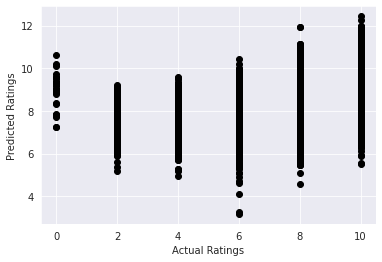

In [ ]:
## Plotting the y_test and Y_pred
x = y_test
y = Y_pred

plt.plot(x, y, 'o', color='black')

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")

## Plotting the values of MSE for n-grams made

In [ ]:
MSE_values = [MSE_uni,MSE_bi,MSE_tri,MSE_ub,MSE_ut,MSE_bt,MSE_ubt]
MSE_values

[1.5467625234806293,
 1.5983417771019321,
 1.7279853352074996,
 1.5403161714922609,
 1.552306314352251,
 1.6108309808776067,
 1.5483997870017656]

In [ ]:
MSE = ['MSE_U','MSE_B','MSE_T','MSE_UB','MSE_UT','MSE_BT','MSE_UBT']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Models')

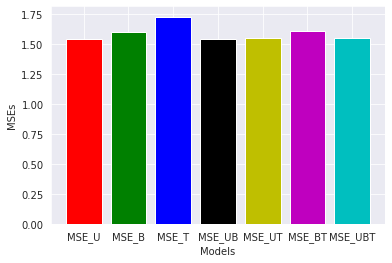

In [ ]:
plt.bar(MSE,MSE_values,width=0.8,bottom=None,align='center',color = 'rgbkymc')
plt.ylabel('MSEs')
plt.xlabel('Models')

## Combination of Unigram and Bigram model returns the least MSE

## Tf-IDF model to get the most similar review/user, ID and the rating given based on the input of the user given. 
## We will use the combination of unigram+bigram model here as it gives the best MSE value 
## I'm using a df_tfidf data I made as I had to add a review id column so didn't want to mess up the Clean_Data

In [ ]:
df_tfidf[0]

{'Review_ID_rand': 85972849,
 'age': 28.0,
 'body type': 'hourglass',
 'bust size': '34d',
 'category': 'romper',
 'fit': 'fit',
 'height': 68.0,
 'item_id': '2260466',
 'rating': 10,
 'rented for': 'vacation',
 'review_date': Timestamp('2016-04-20 00:00:00'),
 'review_date_ts': 1461110400,
 'review_summary': 'So many compliments!',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'size': 14,
 'user_id': '420272',
 'user_id_len': 6,
 'weight': 137.0}

In [ ]:
## Uni+Bi model
 
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in df_tfidf:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

In [ ]:
words = [x[1] for x in counts[:1000]]

In [ ]:
words[:10]

['the', 'i', 'a', 'and', 'it', 'was', 'dress', 'to', 'this', 'but']

In [ ]:
df1 = defaultdict(int)
for d in df_tfidf:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in set(ws + ws2):
        df1[w] += 1

In [ ]:
len(df_tfidf)

192544

In [ ]:
# users = df['user_id'].to_list()

In [ ]:
print("Select a Review Number between 1 and 192544 when prompted")
Review_number = input("Provide a Number: ")
Review_number = int(Review_number)
if Review_number <= len(df_tfidf):
  query = df_tfidf[Review_number]
else:
  print("You selected a review number out of bounds, by default selecting the first review")
  query = df_tfidf[0]

Select a Review Number between 1 and 192544 when prompted
Provide a Number: 3


In [ ]:
# *Not needed*
# print("Select a User ID between 100011 and 999997 when prompted")
# User_number = input("Provide a Number: ")
# User_number = int(User_number)
# if User_number in users:
#   query = df_tfidf[User_number]
# else:
#   print("You selected a User ID out of bounds, by default selecting the first User Id in dataset")
#   query = df_tfidf[0]

In [ ]:
query

{'Review_ID_rand': 47210419,
 'age': 34.0,
 'body type': 'pear',
 'bust size': '34c',
 'category': 'dress',
 'fit': 'fit',
 'height': 65.0,
 'item_id': '126335',
 'rating': 8,
 'rented for': 'formal affair',
 'review_date': Timestamp('2014-02-12 00:00:00'),
 'review_date_ts': 1392163200,
 'review_summary': 'Dress arrived on time and in perfect condition. ',
 'review_text': "I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!",
 'size': 8,
 'user_id': '909926',
 'user_id_len': 6,
 'weight': 135.0}

In [ ]:
tf = defaultdict(int)
r = ''.join([c for c in query['review_text'].lower() if not c in punctuation])
ws = r.split()
ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
for w in ws + ws2:
    tf[w] = 1
    
tfidf = dict(zip(words,[tf[w] * math.log2(len(df_tfidf) / df1[w]) for w in words]))
tfidfQuery = [tf[w] * math.log2(len(df_tfidf) / df1[w]) for w in words]

In [ ]:
maxTf = [(tf[w],w) for w in words]
maxTf.sort(reverse=True)
maxTfIdf = [(tfidf[w],w) for w in words]
maxTfIdf.sort(reverse=True)

In [ ]:
maxTfIdf[:10]

[(6.2255928996960535, 'feel like'),
 (6.132763875257042, 'skin'),
 (5.926383101292672, 'i liked'),
 (5.884172392311414, 'form fitting'),
 (5.761225332150447, 'color was'),
 (5.7386449599975125, 'forgiving'),
 (5.717200708258449, 'form'),
 (5.661147903038946, 'black tie'),
 (5.657361299707961, 'but was'),
 (5.525886598107444, 'the sequins')]

In [ ]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [ ]:
similarities = []
for query2 in df_tfidf:
    tf = defaultdict(int)
    r = ''.join([c for c in query2['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        tf[w] = 1
    tfidf2 = [tf[w] * math.log2(len(df_tfidf) / df1[w]) for w in words]
    similarities.append((Cosine(tfidfQuery, tfidf2),query2['user_id'], query2['review_text'], query2['Review_ID_rand'],query2['rating'],query2['fit']))

In [ ]:
similarities.sort(reverse=True)

In [ ]:
similarities[1]

(0.3689325762015545,
 '51755',
 'This is a very form fitting dress!',
 77425766,
 8,
 'small')

In [ ]:
print("The most similar user based on the review is {}, with {} rating given by the most similar user".format(str(similarities[1][1]),str(similarities[1][4])))

The most similar user based on the review is 51755, with 8 rating given by the most similar user


## Using the tensorflow to create 3 more models like we did in homework 4 to predict the ratings

In [ ]:
Clean_Data[158]

{'age': 29.0,
 'body type': 'hourglass',
 'bust size': '36c',
 'category': 'gown',
 'fit': 'small',
 'height': 68.0,
 'item_id': '131533',
 'rating': 10,
 'rented for': 'wedding',
 'review_date': Timestamp('2016-04-18 00:00:00'),
 'review_date_ts': 1460937600,
 'review_summary': 'classy, beautiful color',
 'review_text': "this is a fun dress- it's very regal looking. The blue color is so bright and pretty, it will definitely catch some eyes. I got lots of compliments. it's also pretty comfortable. I didn't wear a bra even though I have a C cup chest, and it was okay because of the conservative shape of the front/top. I love the way the dress flows. ",
 'size': 9,
 'user_id': '500128',
 'weight': 145.0}

In [ ]:
userIDs = {}
itemIDs = {}
interactions = []
interactionsPerUser = defaultdict(list) ## For filtering the interactions.

for d in Clean_Data:
    u = d['user_id']
    i = d['item_id']
    t = d['review_date_ts']
    r = d['rating']
    #dt = dateutil.parser.parse(t)
    #t = int(dt.timestamp())
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)
    interactions.append((t,u,i,r))
    interactionsPerUser[u].append((t,i,r))

In [ ]:
len(interactionsPerUser)

105571

In [ ]:
interactions[110]

(1415577600, '603920', '191514', 10)

In [ ]:
## Removing users with less than 2 interactions
user_remove = []
for i in userIDs:
  if len(interactionsPerUser[i]) <=2:
    user_remove.append(i)

In [ ]:
user_remove[:10]

In [ ]:
len(user_remove)

89719

In [ ]:
userIDs = {}
itemIDs = {}
interactions = []
interactionsPerUser = defaultdict(list) ## For filtering the interactions.

for d in Clean_Data:
    u = d['user_id']
    if u not in user_remove:
      i = d['item_id']
      t = d['review_date_ts']
      r = d['rating']
      if not u in userIDs: userIDs[u] = len(userIDs)
      if not i in itemIDs: itemIDs[i] = len(itemIDs)
      interactions.append((t,u,i,r))
      interactionsPerUser[u].append((t,i,r))

In [ ]:
len(interactionsPerUser)

15852

In [ ]:
interactions.sort()

In [ ]:
itemIDs['dummy'] = len(itemIDs)

In [ ]:
interactionsWithPrevious = []
for u in interactionsPerUser:
    interactionsPerUser[u].sort()
    lastItem = 'dummy'
    for (t,i,r) in interactionsPerUser[u]:
        interactionsWithPrevious.append((t,u,i,lastItem,r))
        lastItem = i

In [ ]:
sorted_interactions_prev= sorted(interactionsWithPrevious, key=lambda item: (item[1],item[0]), reverse = True)

In [ ]:
sorted_interactions_prev_pd = pd.DataFrame(sorted_interactions_prev, columns=['Time','User','Item_id','Prev','Rating'])

In [ ]:
testdf_prev = sorted_interactions_prev_pd.sort_values('Time',ascending=False).groupby('User').head(1)

In [ ]:
testdf_prev.head()

,Time,User,Item_id,Prev,Rating
16560,1515369600,820575,2616422,307233,10
39499,1515283200,578131,2526611,1658741,10
9151,1515196800,900541,2559060,2517143,10
15415,1515196800,832023,2910961,336097,10
4747,1515196800,952264,2812364,1785957,10


In [ ]:
traindf_prev = sorted_interactions_prev_pd[~sorted_interactions_prev_pd.isin(testdf_prev)].dropna()

In [ ]:
## Converting back to lis of tuples 
records_test = testdf_prev.to_records(index=False)
test = list(records_test)

In [ ]:
## Converting back to lis of tuples 
records_train = traindf_prev.to_records(index=False)
train = list(records_train)

In [ ]:
itemsPerUser = defaultdict(set)
for _,u,i,_ in interactions:
    itemsPerUser[u].add(i)

In [ ]:
items = list(itemIDs.keys())

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.1)

In [ ]:
class FPMC(tf.keras.Model):
    def __init__(self, K, lamb, UI = 1, IJ = 1):
        super(FPMC, self).__init__()
        # Initialize variables
        self.betaI = tf.Variable(tf.random.normal([len(itemIDs)],stddev=0.001))
        self.gammaUI = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaIU = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.gammaIJ = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.gammaJI = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        # Regularization coefficient
        self.lamb = lamb
        # Which terms to include
        self.UI = UI
        self.IJ = IJ

    # Prediction for a single instance
    def predict(self, u, i, j):
        p = self.betaI[i] + self.UI * tf.tensordot(self.gammaUI[u], self.gammaIU[i], 1) +\
                            self.IJ * tf.tensordot(self.gammaIJ[i], self.gammaJI[j], 1)
        return p

    # Regularizer
    def reg(self):
        return self.lamb * (tf.nn.l2_loss(self.betaI) +\
                            tf.nn.l2_loss(self.gammaUI) +\
                            tf.nn.l2_loss(self.gammaIU) +\
                            tf.nn.l2_loss(self.gammaIJ) +\
                            tf.nn.l2_loss(self.gammaJI))

    def call(self, sampleU, # user
                   sampleI, # item
                   sampleJ, # previous item
                   sampleK): # negative item
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        j = tf.convert_to_tensor(sampleJ, dtype=tf.int32)
        k = tf.convert_to_tensor(sampleK, dtype=tf.int32)
        gamma_ui = tf.nn.embedding_lookup(self.gammaUI, u)
        gamma_iu = tf.nn.embedding_lookup(self.gammaIU, i)
        gamma_ij = tf.nn.embedding_lookup(self.gammaIJ, i)
        gamma_ji = tf.nn.embedding_lookup(self.gammaJI, j)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        x_uij = beta_i + self.UI * tf.reduce_sum(tf.multiply(gamma_ui, gamma_iu), 1) +\
                         self.IJ * tf.reduce_sum(tf.multiply(gamma_ij, gamma_ji), 1)
        gamma_uk = tf.nn.embedding_lookup(self.gammaUI, u)
        gamma_ku = tf.nn.embedding_lookup(self.gammaIU, k)
        gamma_kj = tf.nn.embedding_lookup(self.gammaIJ, k)
        gamma_jk = tf.nn.embedding_lookup(self.gammaJI, j)
        beta_k = tf.nn.embedding_lookup(self.betaI, k)
        x_ukj = beta_k + self.UI * tf.reduce_sum(tf.multiply(gamma_uk, gamma_ku), 1) +\
                         self.IJ * tf.reduce_sum(tf.multiply(gamma_kj, gamma_jk), 1)
        return -tf.reduce_mean(tf.math.log(tf.math.sigmoid(x_uij - x_ukj)))

In [ ]:
def trainingStep(model, interactions):
    with tf.GradientTape() as tape:
        sampleU, sampleI, sampleJ, sampleK = [], [], [], []
        for _ in range(100000):
            _,u,i,j,_ = random.choice(interactions) # positive sample
            k = random.choice(items) # negative sample
            while k in itemsPerUser[u]:
                k = random.choice(items)
            sampleU.append(userIDs[u])
            sampleI.append(itemIDs[i])
            sampleJ.append(itemIDs[j])
            sampleK.append(itemIDs[k])

        loss = model(sampleU,sampleI,sampleJ,sampleK)
        loss += model.reg()
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((grad, var) for
                              (grad, var) in zip(gradients, model.trainable_variables)
                              if grad is not None)
    return loss.numpy()

In [ ]:
modelFPMC = FPMC(5, 0.001, 1, 1)
modelMF = FPMC(5, 0.001, 1, 0)
modelFMC = FPMC(5, 0.001, 0, 1)

In [ ]:
interactionsTestPerUser = defaultdict(set)
itemSet = set()
for _,u,i,j,_ in test:
    interactionsTestPerUser[u].add((i,j))
    itemSet.add(i)
    itemSet.add(j)

In [ ]:
def AUCu(model, u, N):
    win = 0
    if N > len(interactionsTestPerUser[u]):
        N = len(interactionsTestPerUser[u])
    positive = random.sample(interactionsTestPerUser[u],N)
    negative = random.sample(itemSet,N)
    for (i,j),k in zip(positive,negative):
        sp = model.predict(userIDs[u], itemIDs[i], itemIDs[j]).numpy()
        sn = model.predict(userIDs[u], itemIDs[k], itemIDs[j]).numpy()
        if sp > sn:
            win += 1
    return win/N

In [ ]:
def AUC(model):
    av = []
    for u in interactionsTestPerUser:
        av.append(AUCu(model, u, 10))
    return sum(av) / len(av)

In [ ]:
for model,name in [(modelFPMC,"FPMC"), (modelMF,"MF"), (modelFMC,"FMC")]:
    for i in range(100):
        obj = trainingStep(model, train)
        if (i % 10 == 9): print("iteration " + str(i+1) + ", objective = " + str(obj))
    print(name + " AUC = " + str(AUC(model)))

iteration 10, objective = 0.67854786
iteration 20, objective = 0.66019565
iteration 30, objective = 0.6493586
iteration 40, objective = 0.650917
iteration 50, objective = 0.650144
iteration 60, objective = 0.64814615
iteration 70, objective = 0.64725626
iteration 80, objective = 0.64855945
iteration 90, objective = 0.647459
iteration 100, objective = 0.6471898
FPMC AUC = 0.6724072672218017
iteration 10, objective = 0.71560854
iteration 20, objective = 0.6892946
iteration 30, objective = 0.6695754
iteration 40, objective = 0.6639319
iteration 50, objective = 0.6622577
iteration 60, objective = 0.66142213
iteration 70, objective = 0.66096777
iteration 80, objective = 0.6613946
iteration 90, objective = 0.66157633
iteration 100, objective = 0.66115785
MF AUC = 0.6666666666666666
iteration 10, objective = 0.7078889
iteration 20, objective = 0.6874008
iteration 30, objective = 0.6794353
iteration 40, objective = 0.66048825
iteration 50, objective = 0.65308744
iteration 60, objective = 0.653